In [1]:
import numpy as np
from adfp import *


import matplotlib.pyplot as plt

In [2]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

In [3]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

variable(-2.0) variable(400.0)


In [7]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 0.001
iters = 50000
iter_per_epoch = 2000
tor = 1e-8

x0_hist = []
x1_hist = []
x0_hist.append(x0.data.copy())
x1_hist.append(x1.data.copy())

for i in range(iters):
    if i % iter_per_epoch == 0:
        print(x0, x1)

    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    x0_hist.append(x0.data.copy())
    x1_hist.append(x1.data.copy())

    if (abs(x0.grad.data) + abs(x1.grad.data)) < tor:
        break

print(f'stopped iter: {i}, x0={x0}, x1={x1}')

variable(0.0) variable(2.0)
variable(0.8263177857050957) variable(0.6820311873361097)
variable(0.9334871723401226) variable(0.8711213202579401)
variable(0.9718168065095137) variable(0.9443132014542008)
variable(0.9876355102559093) variable(0.9753740541653942)
variable(0.9944984367782456) variable(0.9890050527419593)
variable(0.997537182134901) variable(0.9950705599238588)
variable(0.998894543340085) variable(0.9977858821787907)
variable(0.9995032133251143) variable(0.9990046849124559)
variable(0.9997766270233356) variable(0.9995524099731677)
variable(0.9998995394111027) variable(0.9997986868873405)
variable(0.9999548136011498) variable(0.9999094484213882)
variable(0.9999796745184509) variable(0.9999592681146245)
variable(0.9999908571110244) variable(0.9999816777192732)
variable(0.9999958872688824) variable(0.9999917580971419)
variable(0.9999981499685644) variable(0.9999962925374609)
variable(0.9999991677979856) variable(0.9999983322665241)
variable(0.999999625649165) variable(0.9999992

In [9]:
x_range = np.arange(-2.0, 2.0, 0.01) # x軸
y_range = np.arange(-1.0, 3.0, 0.01) # y軸
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)

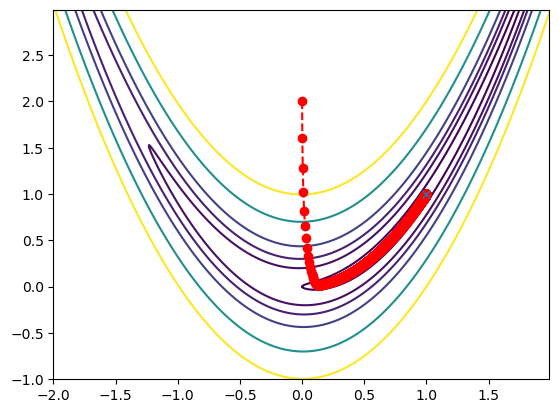

In [10]:
cont = plt.contour(X, Y, Z, [1,5,10,20,50,100])
plt.plot(x0_hist, x1_hist, linestyle="--", color="red", marker='o')
plt.plot(1.0, 1.0, marker='x')
plt.show()

In [5]:
i

1